# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
latitudes = []
longitudes = []
Max_temp = []
Humidities = []
Clouds = []
Wind_speed = []
Country = []
Date = []
Cities_New = []

    # Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

for city in cities:
    try:
        weather_response = requests.get(f"{url}appid={weather_api_key}&q={city}&units={units}").json()
        latitudes.append(weather_response['coord']['lat'])
        longitudes.append(weather_response["coord"]["lon"])
        Max_temp.append(weather_response["main"]["temp_max"])
        Humidities.append(weather_response["main"]["humidity"])
        Clouds.append(weather_response["clouds"]["all"])
        Wind_speed.append(weather_response["wind"]["speed"])
        Country.append(weather_response["sys"]["country"])
        Date.append(weather_response["dt"])
        Cities_New.append(weather_response["name"])
        print(f"City {city} found...")
    except KeyError:
        print("City not found. Skipping...")
        
    
print("----------------Request Complete----------------")


City busselton found...
City banda aceh found...
City faanui found...
City vaini found...
City ugoofaaru found...
City souillac found...
City ushuaia found...
City tonstad found...
City kincardine found...
City punta arenas found...
City butaritari found...
City not found. Skipping...
City lompoc found...
City hofn found...
City usinsk found...
City barrow found...
City macau found...
City not found. Skipping...
City bambous virieux found...
City mizdah found...
City mar del plata found...
City gizo found...
City mataura found...
City lindi found...
City albany found...
City hamilton found...
City mukhen found...
City not found. Skipping...
City kodiak found...
City aklavik found...
City geraldton found...
City gat found...
City haimen found...
City kamaishi found...
City hithadhoo found...
City ahuimanu found...
City longyearbyen found...
City arraial do cabo found...
City basco found...
City horta found...
City victoria found...
City christchurch found...
City not found. Skipping...


City sao filipe found...
City naantali found...
City khandbari found...
City nizhniy kuranakh found...
City jijiga found...
City rocha found...
City avera found...
City sammamish found...
City cafarnaum found...
City riverton found...
City windhoek found...
City sioux lookout found...
City cervo found...
City bicholim found...
City montevideo found...
City lulea found...
City sorong found...
City not found. Skipping...
City itarema found...
City bairiki found...
City lazy found...
City marzuq found...
City amapa found...
City maumere found...
City pitsunda found...
City zharkent found...
City ciudad bolivar found...
City kjollefjord found...
City goundam found...
City srednekolymsk found...
City paamiut found...
City abashiri found...
City lake charles found...
City safford found...
City vigrestad found...
City jega found...
City emerald found...
City bandarbeyla found...
City skjervoy found...
City marsa matruh found...
City savonlinna found...
City not found. Skipping...
City pomorie

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
Cities_data = [Cities_New,Clouds,Country,Date,Humidities,latitudes,longitudes,Max_temp,Wind_speed]

Cities_data = pd.DataFrame(
    {'City': Cities_New,
     'Cloudiness': Clouds,
     'Country': Country,
     'Date': Date,
     'Humidity': Humidities,
     'Latitude': latitudes,
     'Longitude': longitudes,
     'Max Temp': Max_temp,
     'Wind Speed': Wind_speed,
    })

Cities_data.to_csv ('City_Data.csv',index = True, header=True)
Cities_data.head()

City  Cloudiness Country        Date  Humidity  Latitude  Longitude  \
0   Busselton           0      AU  1619312191        75  -33.6500   115.3333   
1  Banda Aceh         100      ID  1619312103        68    5.5577    95.3222   
2      Faanui         100      PF  1619312192        71  -16.4833  -151.7500   
3       Vaini          75      TO  1619312192        83  -21.2000  -175.2000   
4   Ugoofaaru           7      MV  1619312192        71    5.6667    73.0000   

   Max Temp  Wind Speed  
0     19.25        0.38  
1     27.54        3.54  
2     26.57        4.23  
3     28.00        2.57  
4     28.74        3.17

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
Humidity_100 = Cities_data.loc[Cities_data['Humidity']>=100]
Humidity_100

City  Cloudiness Country        Date  Humidity  \
28                  Kiryat Gat          17      IL  1619312197       100   
53   Petropavlovsk-Kamchatskiy          90      RU  1619312201       100   
191             Port Elizabeth          90      ZA  1619312231       100   
205                 Hambantota          93      LK  1619312235       100   
235               Wang Saphung          20      TH  1619312241       100   
270                       Gaza           5      PS  1619312249       100   
297                  Wattegama          58      LK  1619312255       100   
516                     Furano          75      JP  1619312302       100   

     Latitude  Longitude  Max Temp  Wind Speed  
28    31.6100    34.7642     17.78        1.19  
53    53.0452   158.6483      2.00        3.00  
191  -33.9180    25.5701     15.00        2.06  
205    6.1241    81.1185     24.00        1.54  
235   17.3010   101.7685     30.56        1.90  
270   31.5000    34.4667     17.78        0.89  
297    6.7989    81.4808     24.00        1.54  
516   43.2818   142.4743      1.00        3.60

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Cities_data.drop(Cities_data[Cities_data['Humidity'] > 99].index, inplace = False)
clean_city_data

City  Cloudiness Country        Date  Humidity  Latitude  \
0     Busselton           0      AU  1619312191        75  -33.6500   
1    Banda Aceh         100      ID  1619312103        68    5.5577   
2        Faanui         100      PF  1619312192        71  -16.4833   
3         Vaini          75      TO  1619312192        83  -21.2000   
4     Ugoofaaru           7      MV  1619312192        71    5.6667   
..          ...         ...     ...         ...       ...       ...   
575      Padang          40      ID  1619312083        94   -0.9492   
576  Kensington          20      AU  1619312198        55  -33.9167   
577     Alhadas          40      PT  1619312316        88   40.1861   
578       Enugu         100      NG  1619312316        81    6.4402   
579  Dongargaon           6      IN  1619312316        21   20.9667   

     Longitude  Max Temp  Wind Speed  
0     115.3333     19.25        0.38  
1      95.3222     27.54        3.54  
2    -151.7500     26.57        4.23  
3    -175.2000     28.00        2.57  
4      73.0000     28.74        3.17  
..         ...       ...         ...  
575   100.3543     24.00        1.03  
576   151.2167     19.00        3.09  
577    -8.7906     15.00        2.06  
578     7.4943     23.74        1.85  
579    80.8500     28.12        0.38  

[572 rows x 9 columns]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

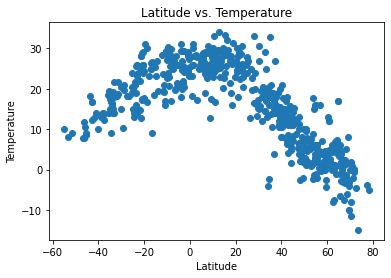

In [7]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.show()

## Latitude vs. Humidity Plot

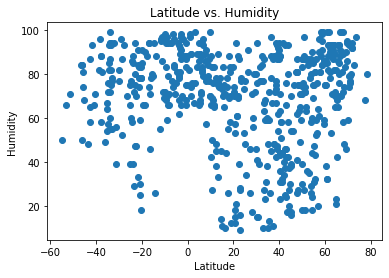

In [8]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

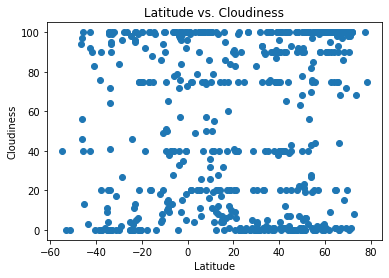

In [9]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

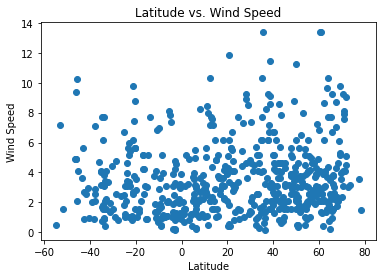

In [10]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.show()

## Linear Regression

In [20]:
South_Hem = clean_city_data.drop(clean_city_data[clean_city_data['Latitude'] > 0].index, inplace = False)
South_Hem
North_Hem = clean_city_data.drop(clean_city_data[clean_city_data['Latitude'] < 0].index, inplace = False)
North_Hem

City  Cloudiness Country        Date  Humidity  Latitude  \
1    Banda Aceh         100      ID  1619312103        68    5.5577   
4     Ugoofaaru           7      MV  1619312192        71    5.6667   
7       Tonstad           0      NO  1619312193        84   58.6626   
8    Kincardine           0      GB  1619312193        87   56.0667   
10   Butaritari          49      KI  1619312193        76    3.0707   
..          ...         ...     ...         ...       ...       ...   
573    Okulovka         100      RU  1619312315        88   58.4008   
574    Chubbuck          20      US  1619312315        66   42.9208   
577     Alhadas          40      PT  1619312316        88   40.1861   
578       Enugu         100      NG  1619312316        81    6.4402   
579  Dongargaon           6      IN  1619312316        21   20.9667   

     Longitude  Max Temp  Wind Speed  
1      95.3222     27.54        3.54  
4      73.0000     28.74        3.17  
7       6.7169      1.67        3.81  
8      -3.7167      3.89        2.06  
10    172.7902     27.98        4.91  
..         ...       ...         ...  
573    33.2908     -0.07        3.72  
574  -112.4661     12.22        4.63  
577    -8.7906     15.00        2.06  
578     7.4943     23.74        1.85  
579    80.8500     28.12        0.38  

[403 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
x_axis_value = North_Hem['Max Temp']
y_axis_value = North_Hem['Latitude']

corcoe = round(st.pearsonr(x_axis_value,y_axis_value)[0],2)

m, b = np.polyfit(x_axis_value, y_axis_value, 1)

North_Hem_plot.plot.scatter(x='Max Temp',
                      y='Latitude',
                      c='green')

plt.title("Northern Hemisphere - Max Temp vs. Latitude")

plt.plot(x_axis_value, m*x_axis_value + b)

NameError: name 'st' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression